<a href="https://colab.research.google.com/github/AndreyKuratov/project_mldm_21/blob/main/MLDM_proj_8_crt_tp_augent_from_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://github.com/iver56/audiomentations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as signal
import os
from tqdm import tqdm

import os
import csv
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image

import librosa as lb 
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

from skimage.transform import resize
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from skimage.transform import resize

TP и FP файлы

In [47]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

def scale_mm(log_m,max_value=255): 
  log_z = (log_m-np.min(log_m))/(np.max(log_m)-np.min(log_m))
  return (log_z*max_value).astype(int)


data_pd_tp = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_tp.csv')
data_pd_fp = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_fp.csv')

files_tp = data_pd_tp.recording_id.unique()
files_fp = data_pd_fp.recording_id.unique()

PATH = '/content/drive/MyDrive/mldm21_project/train/'

PATH_TO_TP_FILES = [PATH+ifile+'.flac' for  ifile in files_tp]
PATH_TO_FP_FILES = [PATH+ifile+'.flac' for  ifile in files_fp]

label_data = files_fp.copy()
img_data = []

SR = 48000
N_FFT = 2048
HOP_L = 512
SIZE_1 = 256
SIZE_2 = 512

augment_1 = Compose([
  AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
  Shift(min_fraction=-1, max_fraction=1, p=1),
])
augment_2 = Compose([
  AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.15, p=0.75),

])



for ipath in tqdm(PATH_TO_TP_FILES):
  signal, sr = lb.load(ipath, sr=SR)
  signal = augment_2(samples=signal, sample_rate=SR)
  mel_signal = lb.feature.melspectrogram(signal,sr=SR,n_fft=N_FFT,hop_length=HOP_L)
  stft = lb.core.stft(signal, hop_length=HOP_L, n_fft=N_FFT)
  stft_ang = np.angle(stft, deg=False)
  stft_am = np.abs(stft)

  log_mel = librosa.power_to_db(mel_signal, ref=np.max)
  log_stft_am = librosa.power_to_db(stft_am, ref=np.max)
  log_stft_ang = librosa.power_to_db(stft_ang, ref=np.max)

  log_m = scale_mm(resize(log_mel,(SIZE_1,SIZE_2)))[::-1].T[None,:].copy()
  log_am = scale_mm(resize(log_stft_am,(SIZE_1,SIZE_2)))[::-1].T[None,:].copy()
  log_ang = scale_mm(resize(log_stft_ang,(SIZE_1,SIZE_2)))[::-1].T[None,:].copy()
  img = np.concatenate([log_m,log_am,log_ang],axis=0)
  img_data.append(img.T)

img_data_np = np.array(img_data,dtype='uint8')

PATH_TO_SAVE = '/content/drive/MyDrive/mldm21_project/'
np.savez(PATH_TO_SAVE+'augBigGauss_tp_256x512_u8', imgs=img_data_np, labels=label_data)


100%|██████████| 1132/1132 [30:29<00:00,  1.62s/it]


# Аугментация сигналов

In [ ]:
!pip install audiomentations

In [45]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, AddShortNoises

In [5]:
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    Shift(min_fraction=-1, max_fraction=1, p=1),
])

# Generate 2 seconds of dummy audio for the sake of example
samples = np.random.uniform(low=-0.2, high=0.2, size=(32000,)).astype(np.float32)

# Augment/transform/perturb the audio data
augmented_samples = augment(samples=samples, sample_rate=16000)

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(samples[:500])
plt.plot(augmented_samples[:500])

In [12]:
data_pd_tp = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_tp.csv')
data_pd_fp = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_fp.csv')

files_tp = data_pd_tp.recording_id.unique()
files_fp = data_pd_fp.recording_id.unique()

PATH = '/content/drive/MyDrive/mldm21_project/train/'

PATH_TO_TP_FILES = [PATH+ifile+'.flac' for  ifile in files_tp]

In [41]:
SR = 48000
signal, sr = lb.load(PATH_TO_TP_FILES[5], sr=SR)

In [44]:
import IPython.display as ipd

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.15, p=0.5),
    Shift(min_fraction=-1, max_fraction=1, p=1),
])

augmented_samples = augment(samples=signal, sample_rate=SR)
ipd.Audio(augmented_samples, rate=sr)

In [38]:
augment_shift = Compose([
    Shift(min_fraction=-1, max_fraction=1, p=1,),
])

augmented_samples = augment_shift(samples=signal, sample_rate=SR)

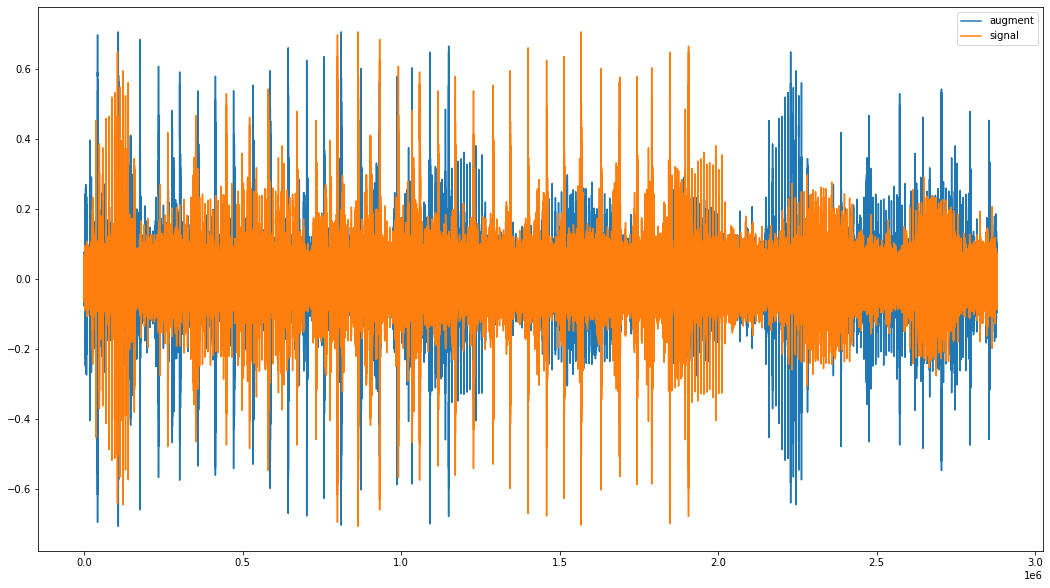

In [39]:
Indx=-1
plt.figure(figsize=(18,10))
#plt.subplot(2,1,1)
plt.plot(augmented_samples[:Indx],label='augment')
#plt.subplot(2,1,2)
plt.plot(signal[:Indx],label='signal',)
plt.legend()